In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

2025-07-03 08:52:31.005550: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751532751.020222     785 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751532751.024685     785 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751532751.038191     785 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751532751.038206     785 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751532751.038208     785 computation_placer.cc:177] computation placer alr

In [15]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

red['type'] = 1
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
wines.dropna(inplace=True)

In [16]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [17]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


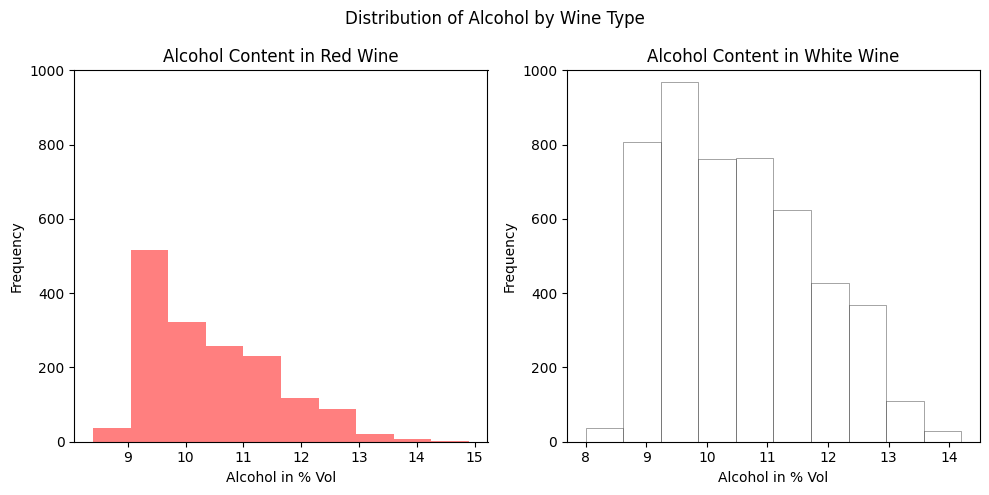

In [20]:
# Plotting Distribution of Alcohol
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(wines[wines['type'] == 1].alcohol, bins=10, facecolor='red', alpha=0.5, label='Red wine')
ax[1].hist(wines[wines['type'] == 0].alcohol, bins=10, facecolor='white', edgecolor='black', lw=0.5, alpha=0.5, label='White wine')

for a in ax:
    a.set_ylim([0, 1000])
    a.set_xlabel('Alcohol in % Vol')
    a.set_ylabel('Frequency')

ax[0].set_title('Alcohol Content in Red Wine')
ax[1].set_title('Alcohol Content in White Wine')

fig.suptitle('Distribution of Alcohol by Wine Type')
plt.tight_layout()
plt.show()

In [21]:
# Splitting Data into Training and Testing Sets
X = wines.iloc[:, :-1]
y = wines['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=45)

In [22]:
# Creating Neural Network Model
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=12))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-03 08:54:10.587876: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
# Training the Model
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 4s 858us/step - accuracy: 0.9151 - loss: 0.2419
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 4s 843us/step - accuracy: 0.9480 - loss: 0.1667
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 4s 840us/step - accuracy: 0.9561 - loss: 0.1368


In [24]:
# Making Predictions
y_pred = model.predict(X_test)

y_pred_labels = (y_pred >= 0.5).astype(int)

for prediction in y_pred_labels[:12]:
    wine_type = "Red wine" if prediction == 1 else "White wine"
    print(f"Prediction: {wine_type}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
Prediction: Red wine
Prediction: White wine
Prediction: Red wine
Prediction: White wine
Prediction: White wine
Prediction: Red wine
